In [1]:
# Code written by: Michael Bramble | michael.s.bramble@jpl.nasa.gov
# testing the process for loading unmixing endmembers for EMIT AMD investigation
# also used to investigate different applciations of spectral resampling
# 20240124 - initial version

import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

In [2]:
# RELAB spectral library
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/jarosite/c1jb709.txt'
df_c1jb709 = pd.read_csv(file,header=0,skiprows=2,delimiter="\t",usecols=[0, 1],names=["wavelength","reflectance"])

In [3]:
# load EMIT wavelengths
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/emit_wavelengths.txt'
wavelengths_emit_nm = pd.read_csv(file,header=None)
wavelengths_emit_um = wavelengths_emit_nm[0]/1000

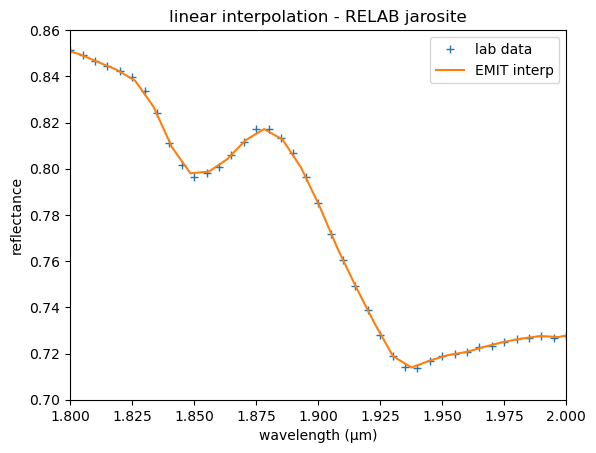

In [25]:
# resample wavelengths - linear interpolation 

x = df_c1jb709['wavelength'] # LAB WAVELENGTHS
y = df_c1jb709['reflectance'] # LAB REFLECTANCE
xnew = wavelengths_emit_um # EMIT WAVELENGTHS
ynew = np.interp(xnew, x, y) # LAB RESAMPLED TO EMIT

# # simplified into fewer lines
# ynew = np.interp(wavelengths_emit_um, df_c1jb709['wavelength'], df_c1jb709['reflectance'])

plt.plot(x, y, '+', label='lab data')
plt.plot(xnew, ynew, label='EMIT interp')
plt.title('linear interpolation - RELAB jarosite')
plt.xlabel('wavelength (µm)')
plt.ylabel('reflectance')
plt.legend(loc='best')
plt.axis((1.8, 2.0, 0.7, 0.86))
plt.show()

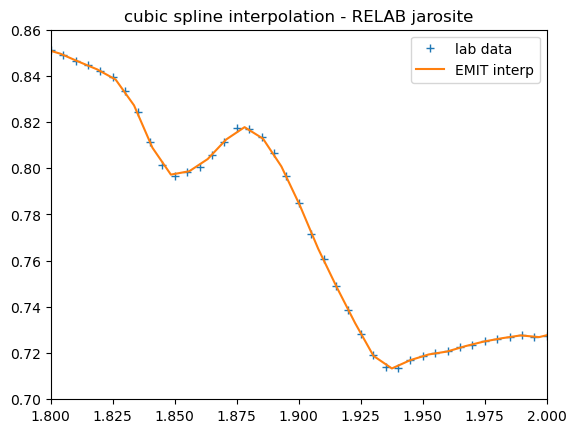

In [5]:
# resample wavelengths - cubic spline

x = df_c1jb709['wavelength'] # LAB WAVELENGTHS
y = df_c1jb709['reflectance'] # LAB REFLECTANCE
spl = CubicSpline(x, y)
xnew = wavelengths_emit_um # EMIT WAVELENGTHS
ynew = spl(xnew) # LAB RESAMPLED TO EMIT

# # simplified into fewer lines
# spl = CubicSpline(df_c1jb709['wavelength'], df_c1jb709['reflectance'])
# ynew = spl(wavelengths_emit_um) # LAB RESAMPLED TO EMIT

plt.plot(x, y, '+', label='lab data')
plt.plot(xnew, ynew, label='EMIT interp')
plt.legend(loc='best')
plt.title('cubic spline interpolation - RELAB jarosite')
plt.xlabel('wavelength (µm)')
plt.ylabel('reflectance')
plt.axis((1.8, 2.0, 0.7, 0.86))
plt.show()

In [6]:
# USGS spectral library

# wavelengths
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Wavelengths_BECK_Beckman_0.2-3.0_microns.txt'
df_usgs_beck = pd.read_csv(file,header=None,skiprows=1,names=["wavelength"])

file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt'
df_usgs_asd = pd.read_csv(file,header=None,skiprows=1,names=["wavelength"])

# schwertmannite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Schwertmannite_BZ93-1_BECKb_AREF.txt'
df_schwertmannite_BZ93_1 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])



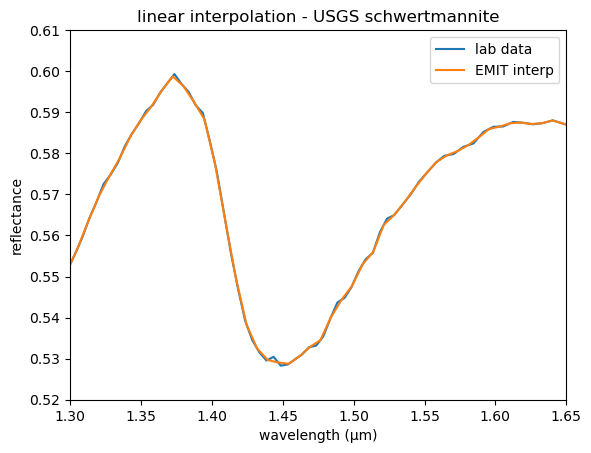

In [24]:
# USGS - linear interpolation

y_schwertmannite_BZ93_1 = np.interp(wavelengths_emit_um, df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance']) # LAB RESAMPLED TO EMIT

plt.plot(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'], label='lab data')
plt.plot(wavelengths_emit_um, y_schwertmannite_BZ93_1, label='EMIT interp')
plt.legend(loc='best')
plt.title('linear interpolation - USGS schwertmannite')
plt.xlabel('wavelength (µm)')
plt.ylabel('reflectance')
plt.axis((1.3, 1.65, 0.52, 0.61))
# plt.axis((0.1, 3, 0, 1))
plt.show()


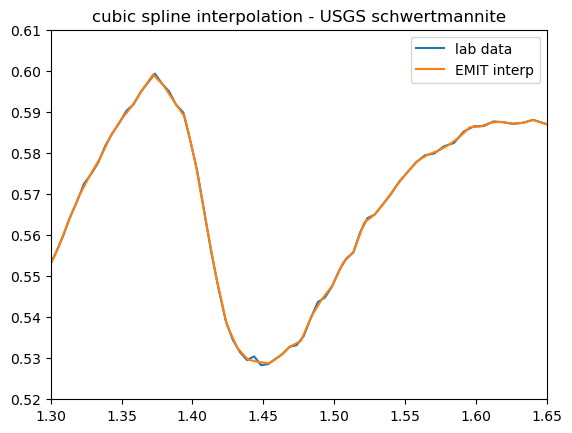

In [8]:
# USGS - cubic spline interpolation
# NOTE THE DIFFERENCE NEEDED TO REPLACE THE NO DATA VALUE (-1.23e+34)

# df_schwertmannite_BZ93_1['reflectance'] =  df_schwertmannite_BZ93_1['reflectance'].mask(df_schwertmannite_BZ93_1['reflectance'] < 0)
# df_schwertmannite_BZ93_1.replace(-1.23e+34,0)

spl = CubicSpline(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'].replace(-1.23e+34,0))
y_schwertmannite_BZ93_1 = spl(wavelengths_emit_um)

plt.plot(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'], label='lab data')
plt.plot(wavelengths_emit_um, y_schwertmannite_BZ93_1, label='EMIT interp')
plt.legend(loc='best')
plt.title('cubic spline interpolation - USGS schwertmannite')
plt.xlabel('wavelength (µm)')
plt.ylabel('reflectance')
plt.axis((1.3, 1.65, 0.52, 0.61))
# plt.axis((0.1, 3, 0, 1))
plt.show()


In [9]:
min(df_schwertmannite_BZ93_1['reflectance'].replace(-1.23e+34,0))

0.0

In [18]:
# testing making endmember array

# first, bulk endmember loading
# pyrite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Pyrite_S29-4_BECKc_AREF.txt'
df_pyrite_S29_4 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Pyrite_LV95-6A_Weath_on_Tail_BECKb_AREF.txt'
df_pyrite_LV95_6A = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
# goethite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Goethite_WS222_Medium_Gr._BECKa_AREF.txt'
df_goethite_WS222_medium_gr = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
# jarosite
file = '/Users/bramble/Downloads/usgs_splib07/ASCIIdata/ASCIIdata_splib07a/ChapterM_Minerals/splib07a_Jarosite_GDS99_K_200C_Syn_BECKa_AREF.txt'
df_jarosite_GDS99_K_200C = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
# schwertmannite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Schwertmannite_BZ93-1_BECKb_AREF.txt'
df_schwertmannite_BZ93_1 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
# copiapite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Copiapite_GDS21_BECKb_AREF.txt'
df_copiapite_GDS21 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
# hematite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Hematite_GDS27_BECKa_AREF.txt'
df_hematite_GDS27 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])
# ferrihydrite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Ferrihydrite_GDS75_Syn_F6_BECKb_AREF.txt'
df_ferrihydrite_GDS75_syn_f6 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])


# pyrite
spl = CubicSpline(df_usgs_beck['wavelength'], df_pyrite_S29_4['reflectance'].replace(-1.23e+34,0))
y_pyrite_S29_4 = spl(wavelengths_emit_um)
spl = CubicSpline(df_usgs_beck['wavelength'], df_pyrite_LV95_6A['reflectance'].replace(-1.23e+34,0))
y_pyrite_LV95_6A = spl(wavelengths_emit_um)
# goethite
spl = CubicSpline(df_usgs_beck['wavelength'], df_goethite_WS222_medium_gr['reflectance'].replace(-1.23e+34,0))
y_goethite_WS222_medium_gr = spl(wavelengths_emit_um)
# jarosite
spl = CubicSpline(df_usgs_beck['wavelength'], df_jarosite_GDS99_K_200C['reflectance'].replace(-1.23e+34,0))
y_jarosite_GDS99_K_200C = spl(wavelengths_emit_um)
# schwertmannite
spl = CubicSpline(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'].replace(-1.23e+34,0))
y_schwertmannite_BZ93_1 = spl(wavelengths_emit_um)
# copiapite
spl = CubicSpline(df_usgs_beck['wavelength'], df_copiapite_GDS21['reflectance'].replace(-1.23e+34,0))
y_copiapite_GDS21 = spl(wavelengths_emit_um)
# hematite
spl = CubicSpline(df_usgs_beck['wavelength'], df_hematite_GDS27['reflectance'].replace(-1.23e+34,0))
y_hematite_GDS27 = spl(wavelengths_emit_um)
# ferrihydrite
spl = CubicSpline(df_usgs_beck['wavelength'], df_ferrihydrite_GDS75_syn_f6['reflectance'].replace(-1.23e+34,0))
y_ferrihydrite_GDS75_syn_f6 = spl(wavelengths_emit_um)

# combine into an endmember matrix
# use either np.concatenate or np.column_stack/stack/etc.

# endmembers = np.concatenate((y_pyrite_LV95_6A, y_pyrite_LV95_6A, y_hematite_GDS27, y_goethite_WS222_medium_gr, y_jarosite_GDS99_K_200C, y_schwertmannite_BZ93_1, y_copiapite_GDS21 ,y_ferrihydrite_GDS75_syn_f6), axis=0)

endmembers = np.column_stack((y_pyrite_LV95_6A, y_pyrite_LV95_6A, y_hematite_GDS27, y_goethite_WS222_medium_gr, y_jarosite_GDS99_K_200C, y_schwertmannite_BZ93_1, y_copiapite_GDS21 ,y_ferrihydrite_GDS75_syn_f6))

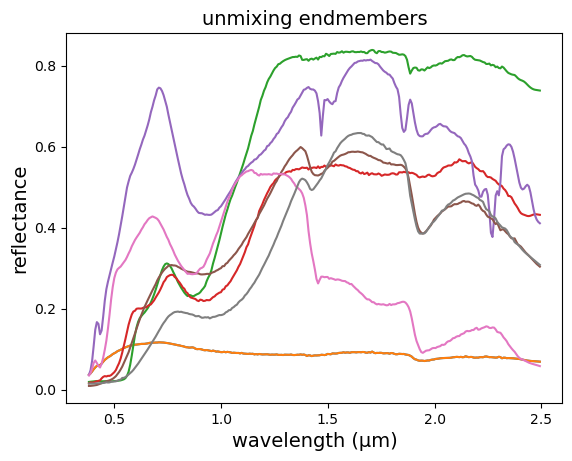

In [23]:
plt.plot(wavelengths_emit_um,endmembers)
# plt.axis((0.1, 3, 0, 1))
plt.title('unmixing endmembers', fontsize=14)
plt.xlabel('wavelength (µm)', fontsize=14)
plt.ylabel('reflectance', fontsize=14)
# plt.legend()
plt.show()